# Random forest

In [1]:
library(tidyverse)
library(randomForest)
library(caret)
#install.packages("ranger")
library(ranger)
#install.packages("e1071")
library(e1071)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching 

## Reading in the data

In [2]:
sum_control_ATAC_bin_rm = read.csv("sum_control_ATAC_bin_rm.csv")
sum_control_ATAC = read.csv("sum_control_ATAC.csv")

ATAC_val <- sum_control_ATAC_bin_rm$ATAC_val
sum_control_ATAC_bin_rm <- sum_control_ATAC_bin_rm %>% select(-ATAC_val)

head(sum_control_ATAC_bin_rm)

X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
8.699646e-07,3.479859e-06,2.609894e-06,0.000000e+00,8.699646e-07,8.699646e-07,1.739929e-06,1.739929e-06,0.000000e+00,2.609894e-06,...,0,0,0,0,0,0,0,0,0,0.000000e+00
8.313727e-07,8.313727e-07,0.000000e+00,8.313727e-07,1.662745e-06,8.313727e-07,8.313727e-07,5.819609e-06,3.325491e-06,3.325491e-06,...,0,0,0,0,0,0,0,0,0,0.000000e+00
8.705774e-07,1.741155e-06,8.705774e-07,8.705774e-07,0.000000e+00,0.000000e+00,2.611732e-06,3.482309e-06,0.000000e+00,8.705774e-07,...,0,0,0,0,0,0,0,0,0,8.705774e-07
0.000000e+00,1.700685e-06,0.000000e+00,8.503423e-07,8.503423e-07,1.700685e-06,8.503423e-07,0.000000e+00,8.503423e-07,8.503423e-07,...,0,0,0,0,0,0,0,0,0,0.000000e+00
0.000000e+00,9.416577e-07,0.000000e+00,0.000000e+00,9.416577e-07,0.000000e+00,9.416577e-07,0.000000e+00,2.824973e-06,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0.000000e+00
0.000000e+00,0.000000e+00,0.000000e+00,4.221123e-06,1.688449e-06,1.688449e-06,8.442245e-07,0.000000e+00,2.532674e-06,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0.000000e+00


In [3]:
head(ATAC_val)
str(ATAC_val)

[1] 0.5931657 0.4089315 0.3058228 0.4764137 0.2862775 0.3169988

 num [1:10303] 0.593 0.409 0.306 0.476 0.286 ...


## Random forest

In [4]:
set.seed(0)

x <- getModelInfo(model = "ranger")[[1]]
x$parameters
x$label
x$type

parameter,class,label
mtry,numeric,#Randomly Selected Predictors
splitrule,character,Splitting Rule
min.node.size,numeric,Minimal Node Size


[1] "Random Forest"

[1] "Classification" "Regression"

In [ ]:
training_x <- sum_control_ATAC_bin_rm %>% as.data.frame()
training_y <- ATAC_val

trControl <- trainControl(method = "repeatedcv", number = 10, repeats = 1, verboseIter = T)
  
fit <- train(x = training_x, 
             y = training_y, 
             method = "ranger",
             trControl = trControl
    )


In [ ]:
print(fit)
ggplot(fit)

In [ ]:
mean(fit$resample$RMSE)

In [ ]:
# get the predicted values
res_rf_pred <- tibble(observed = ATAC_val, predicted = 

In [ ]:
ggplot(res_rf_pred, aes(x = observed, y = predicted)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

In [ ]:
cor(res_rf_pred$observed, res_rf_pred$predicted)

### Random forest with the ranger package

In [4]:
sum_control_ATAC_bin_rm = read.csv("sum_control_ATAC_bin_rm.csv")


In [5]:
set.seed(0)

(fit = randomForest(ATAC_val~., data = sum_control_ATAC_bin_rm, ntree = 500, do.trace = T))

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |  0.01645   105.07 |
   2 |  0.01559    99.58 |
   3 |  0.01474    94.15 |
   4 |  0.01413    90.24 |
   5 |  0.01349    86.22 |
   6 |  0.01295    82.70 |
   7 |  0.01233    78.80 |
   8 |  0.01169    74.65 |
   9 |  0.01134    72.43 |
  10 |  0.01102    70.38 |
  11 |  0.01078    68.85 |
  12 |  0.01049    67.03 |
  13 |  0.01025    65.47 |
  14 |  0.01005    64.20 |
  15 |  0.00983    62.80 |
  16 | 0.009658    61.70 |
  17 | 0.009531    60.89 |
  18 |  0.00945    60.37 |
  19 | 0.009355    59.76 |
  20 | 0.009249    59.09 |
  21 | 0.009179    58.64 |
  22 | 0.009135    58.36 |
  23 | 0.009087    58.06 |
  24 | 0.009025    57.66 |
  25 | 0.008993    57.45 |
  26 | 0.008952    57.19 |
  27 | 0.008904    56.89 |
  28 |  0.00885    56.54 |
  29 | 0.008806    56.26 |
  30 | 0.008772    56.04 |
  31 | 0.008735    55.81 |
  32 | 0.008701    55.58 |
  33 |  0.00869    55.52 |
  34 | 0.008669    55.38 |
  35 | 0.008651    55.27 |
 


Call:
 randomForest(formula = ATAC_val ~ ., data = sum_control_ATAC_bin_rm,      ntree = 500, do.trace = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 223

          Mean of squared residuals: 0.007995095
                    % Var explained: 48.92

In [6]:
head(fit$mse)

[1] 0.01644655 0.01558686 0.01473669 0.01412525 0.01349496 0.01294519

[1] 0.01644655 0.01558686 0.01473669 0.01412525 0.01349496 0.01294519

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

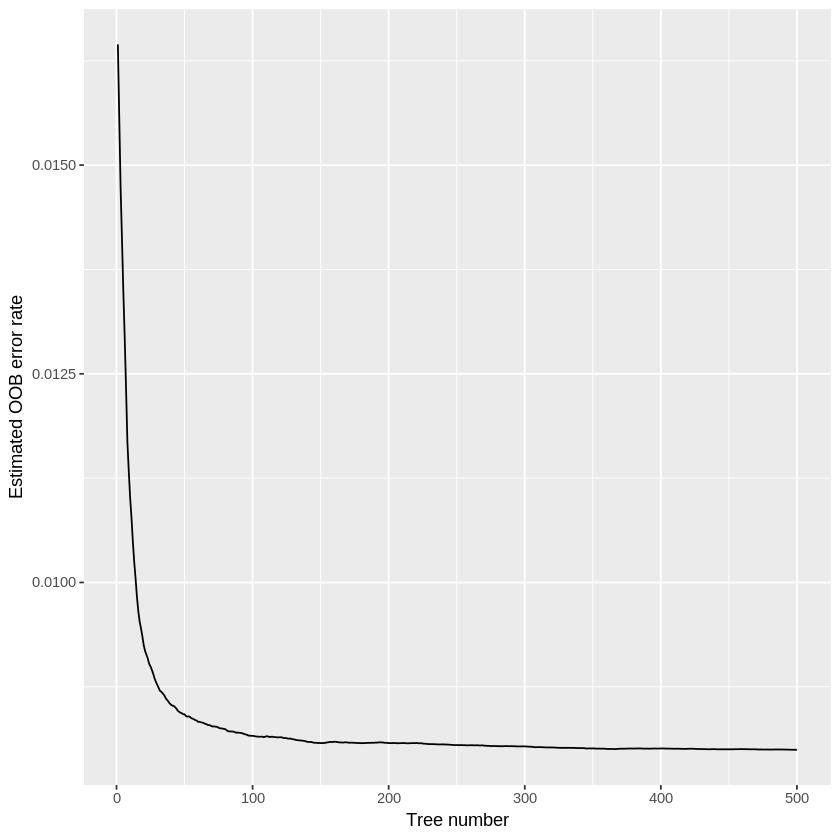

In [7]:
head(fit$mse)

#fit$confusion # using all fitted trees

tree_n <- seq(1, 500, 1)

#fit$mse[,1]

ggplot(data = NULL, aes(x = tree_n, y = fit$mse)) + 
  geom_line() + 
  xlab("Tree number") + 
  ylab("Estimated OOB error rate")


pd <- fit$mse %>% tbl_df() %>% mutate(x = row_number())
#pd %>% arrange(OOB)

In [8]:
cross_validation <- function(dataset, mtry=NA, k=10){

  if(is.na(mtry)) {
    mtry = floor(sqrt(ncol(dataset)))
  }

  cat(paste(Sys.time(), "Doing mtry:", mtry, "k:", k, "\n"))
  flush.console()

  cvfolds <- cut(seq_len(nrow(dataset)), breaks = k, labels = F)
  cvfolds <- sample(cvfolds)
  
  observed  <- dataset$ATAC_val
  predicted <- observed
  
  for (i in 1:k){
    rows      <- which(cvfolds==i)
    testdata  <- dataset[rows,]
    testdata  <- testdata %>% select(-ATAC_val)
    traindata <- dataset[-rows,]
    
    fit <-  randomForest(y = traindata$ATAC_val,
                         x = traindata %>% select(-ATAC_val),
                     ntree = 700,
                      mtry = mtry,
                  do.trace = F)
    
    tmp       <- predict(fit, newdata = testdata, type="response")
    predicted[rows] <- tmp
  }
  
  mean(observed)
  se    <- (observed-predicted)^2
  mse   <- mean(se)
  (rmse <- sqrt(mse))
  flush.console()
  return(rmse)
}

set.seed(0)
cross_validation(dataset = sum_control_ATAC_bin_rm, k = 10)

2021-09-20 07:03:49 Doing mtry: 25 k: 10 


[1] 0.09005563

In [ ]:
pd <- tibble(raw=c(0.1, 0.5, 1, 2, 4, 8, 12, 16)) %>%
  mutate(mtry = floor(raw*sqrt(ncol(sum_control_ATAC_bin_rm)))) %>%
  mutate(rmse = NA)

pd


for (i in 1:nrow(pd)){
  set.seed(0)
  pd$rmse[i] = cross_validation(dataset = sum_control_ATAC_bin_rm, mtry = pd$mtry[i], k = 10)
}

knitr::kable(pd)

ggplot(pd, aes(x = mtry, y = rmse)) +
  geom_point() + 
  geom_line() + 
  xlab("m value") + 
  ylab("CV rmse")

raw,mtry,rmse
0.1,2,NA
0.5,12,NA
1.0,25,NA
2.0,51,NA
4.0,103,NA
8.0,207,NA
12.0,311,NA
16.0,414,NA


2021-09-20 07:51:59 Doing mtry: 2 k: 10 
2021-09-20 08:04:35 Doing mtry: 12 k: 10 
2021-09-20 08:32:55 Doing mtry: 25 k: 10 
2021-09-20 09:21:16 Doing mtry: 51 k: 10 
2021-09-20 10:52:31 Doing mtry: 103 k: 10 
2021-09-20 13:42:52 Doing mtry: 207 k: 10 
2021-09-20 19:09:23 Doing mtry: 311 k: 10 
